# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import requests
import time
import citipy
import json
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities_csv.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73aa26b1479865adb8f116dee02cf587'

## Generate Cities List

In [3]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
number = 1

city_name = []
lat = []
lng = []
temp = []
humid = []
clouds = []
wind = []
dates = []
country = []
temp_max = []

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    try:
        city_data = (requests.get(url + '&q=' + city)).json()
        city_name.append(city_data["name"])
        lat.append(city_data["coord"]["lat"])
        lng.append(city_data["coord"]["lon"])
        temp.append(city_data["main"]["temp"])
        temp_max.append(city_data["main"]["temp_max"])
        humid.append(city_data["main"]["humidity"])
        clouds.append(city_data["clouds"]["all"])
        wind.append(city_data["wind"]["speed"])
        dates.append(city_data["dt"])
        country.append(city_data["sys"]["country"])
        print(f'Processing Record {number} of Set {len(cities)}. | {city}')
        number = number + 1
    
    except KeyError:
        print(f'City not found. Skipping...')
        
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 631. | avarua
Processing Record 2 of Set 631. | andros town
Processing Record 3 of Set 631. | wajima
Processing Record 4 of Set 631. | ukiah
Processing Record 5 of Set 631. | castro
Processing Record 6 of Set 631. | teresina
Processing Record 7 of Set 631. | atuona
Processing Record 8 of Set 631. | tasiilaq
Processing Record 9 of Set 631. | weihe
Processing Record 10 of Set 631. | vaini
Processing Record 11 of Set 631. | san jose
Processing Record 12 of Set 631. | margate
Processing Record 13 of Set 631. | suamico
Processing Record 14 of Set 631. | hermanus
Processing Record 15 of Set 631. | soyo
Processing Record 16 of Set 631. | busselton
Processing Record 17 of Set 631. | puerto ayora
Processing Record 18 of Set 631. | kantang
Processing Record 19 of Set 631. | east london
Processing Record 20 of Set 631. | saint-philippe
Processing Record 21 of Set 631. | si bun ruang
Processing Record 22 of Set 631. 

Processing Record 177 of Set 631. | mercedes
Processing Record 178 of Set 631. | mount isa
Processing Record 179 of Set 631. | bonavista
Processing Record 180 of Set 631. | wuchi
Processing Record 181 of Set 631. | catamarca
Processing Record 182 of Set 631. | gudibanda
Processing Record 183 of Set 631. | kalmunai
Processing Record 184 of Set 631. | kirkwall
Processing Record 185 of Set 631. | tevaitoa
Processing Record 186 of Set 631. | nyagan
Processing Record 187 of Set 631. | marienburg
Processing Record 188 of Set 631. | buin
Processing Record 189 of Set 631. | trat
City not found. Skipping...
Processing Record 190 of Set 631. | kaitangata
Processing Record 191 of Set 631. | sambava
Processing Record 192 of Set 631. | samarai
Processing Record 193 of Set 631. | saint-pierre
Processing Record 194 of Set 631. | broken hill
Processing Record 195 of Set 631. | port alfred
Processing Record 196 of Set 631. | vallenar
Processing Record 197 of Set 631. | dwarka
Processing Record 198 of S

Processing Record 349 of Set 631. | berbera
Processing Record 350 of Set 631. | vostok
Processing Record 351 of Set 631. | te anau
Processing Record 352 of Set 631. | ginir
Processing Record 353 of Set 631. | yulara
Processing Record 354 of Set 631. | cirebon
Processing Record 355 of Set 631. | xinyang
Processing Record 356 of Set 631. | baykit
Processing Record 357 of Set 631. | guaraniacu
Processing Record 358 of Set 631. | linxia
Processing Record 359 of Set 631. | san patricio
Processing Record 360 of Set 631. | gotsu
City not found. Skipping...
Processing Record 361 of Set 631. | ust-koksa
Processing Record 362 of Set 631. | omboue
Processing Record 363 of Set 631. | parelhas
Processing Record 364 of Set 631. | reyes
Processing Record 365 of Set 631. | morgan city
Processing Record 366 of Set 631. | tyrma
City not found. Skipping...
City not found. Skipping...
Processing Record 367 of Set 631. | uthal
Processing Record 368 of Set 631. | snezhnogorsk
Processing Record 369 of Set 63

Processing Record 520 of Set 631. | tsumeb
Processing Record 521 of Set 631. | hudson bay
Processing Record 522 of Set 631. | buraydah
City not found. Skipping...
City not found. Skipping...
Processing Record 523 of Set 631. | karratha
Processing Record 524 of Set 631. | tautira
Processing Record 525 of Set 631. | taltal
Processing Record 526 of Set 631. | vaitape
Processing Record 527 of Set 631. | krasnoselkup
Processing Record 528 of Set 631. | mangan
Processing Record 529 of Set 631. | tandil
Processing Record 530 of Set 631. | bismil
Processing Record 531 of Set 631. | bowen
City not found. Skipping...
Processing Record 532 of Set 631. | shitkino
Processing Record 533 of Set 631. | coquimbo
Processing Record 534 of Set 631. | bereda
Processing Record 535 of Set 631. | mnogovershinnyy
Processing Record 536 of Set 631. | moose jaw
Processing Record 537 of Set 631. | petropavlovsk-kamchatskiy
City not found. Skipping...
Processing Record 538 of Set 631. | rundu
Processing Record 539 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data_df = pd.DataFrame({"City" : city_name,
                           "Lat" : lat,
                           "Lng": lng,
                           "Max Temp": temp_max,
                           "Humidity": humid,
                           "Cloudiness": clouds,
                           "Wind Speed": wind,
                           "Country": country,
                           "Date": dates})
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.21,-159.78,71.60,78,75,5.82,CK,1598282091
1,Andros Town,24.70,-77.77,87.80,70,75,23.04,BS,1598282091
2,Wajima,37.40,136.90,77.70,79,0,5.32,JP,1598282091
3,Ukiah,39.15,-123.21,71.01,56,40,1.54,US,1598282091
4,Castro,-24.79,-50.01,57.60,75,82,9.28,BR,1598282091


In [6]:
#https://stackoverflow.com/questions/17578115/pass-percentiles-to-pandas-agg-function
def q25(x):
    return x.quantile(0.25)
def q50(x):
    return x.quantile(0.5)
def q75(x):
    return x.quantile(0.75)
summary_table = city_data_df.agg(["count","mean","std","min",
                                    q25,q50,q75,"max"])
summary_table = summary_table.drop(['City','Country'], axis=1)
summary_table

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,5.750000e+02
min,-54.800000,-179.170000,26.730000,1.000000,0.000000,0.110000,1.598282e+09
max,77.480000,178.420000,112.960000,100.000000,100.000000,34.450000,1.598282e+09
mean,19.885809,13.329043,69.882296,69.020870,46.914783,7.921078,1.598282e+09
std,33.614672,91.776170,15.681602,22.055274,37.991491,5.415747,6.046117e+01
q25,-9.515000,-68.285000,57.200000,58.000000,4.000000,4.000000,1.598282e+09
q50,24.090000,16.980000,73.400000,74.000000,40.000000,6.710000,1.598282e+09
q75,47.640000,95.320000,81.635000,85.000000,90.000000,11.010000,1.598282e+09


In [7]:
#city_data_df.to_csv("output_data/cities.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#No cities with humidity higher than 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

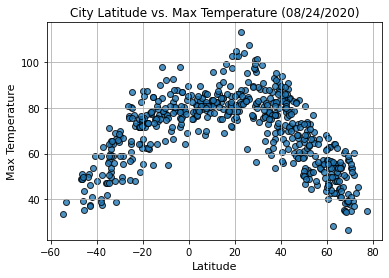

In [9]:
#https://docs.python.org/3/library/datetime.html
today = datetime.date.today()
today = today.strftime("%m/%d/%Y")
plt.scatter(lat, temp_max,
           edgecolor = "black", linewidth=1, marker="o", alpha=0.8, label ="cities")
plt.title(f"City Latitude vs. Max Temperature ({today})", fontsize=12)
plt.xlabel("Latitude", fontsize = 11)
plt.ylabel("Max Temperature", fontsize = 11)
plt.grid(True)
# The inverse latitudes have similar max temperatures, 
# while the latitudes closest to 0, have a higher temperature.
plt.savefig("Images/City Latitude vs. Max Temperature.png")

## Latitude vs. Humidity Plot

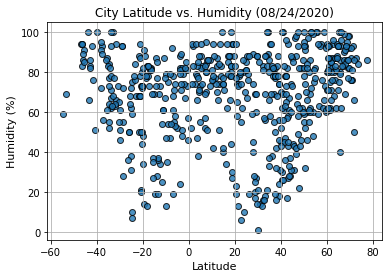

In [10]:
today = datetime.date.today()
today = today.strftime("%m/%d/%Y")
plt.scatter(lat, humid,
           edgecolor = "black", linewidth=1, marker="o", alpha=0.8, label ="cities")
plt.title(f"City Latitude vs. Humidity ({today})", fontsize=12)
plt.xlabel("Latitude", fontsize = 11)
plt.ylabel("Humidity (%)", fontsize = 11)
plt.grid(True)
# Mostly all of the cities have high humidity in all of the latitudes.
plt.savefig("Images/City Latitude vs. Humidity.png")

## Latitude vs. Cloudiness Plot

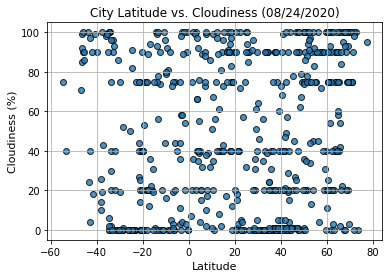

In [11]:
today = datetime.date.today()
today = today.strftime("%m/%d/%Y")
plt.scatter(lat, clouds,
           edgecolor = "black", linewidth=1, marker="o", alpha=0.8, label ="cities")
plt.title(f"City Latitude vs. Cloudiness ({today})", fontsize=12)
plt.xlabel("Latitude", fontsize = 11)
plt.ylabel("Cloudiness (%)", fontsize = 11)
plt.grid(True)
# Cloudiness does not have a very good correlaton, it's all over the place.
plt.savefig("Images/City Latitude vs. Cloudiness.png")

## Latitude vs. Wind Speed Plot

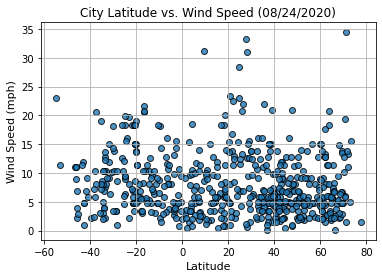

In [12]:
today = datetime.date.today()
today = today.strftime("%m/%d/%Y")
plt.scatter(lat, wind,
           edgecolor = "black", linewidth=1, marker="o", alpha=0.8, label ="cities")
plt.title(f"City Latitude vs. Wind Speed ({today})", fontsize=12)
plt.xlabel("Latitude", fontsize = 11)
plt.ylabel("Wind Speed (mph)", fontsize = 11)
plt.grid(True)
# In most of the latitudes wind speed is low, with latitudes closest to 20, 
# having the highest.
plt.savefig("Images/City Latitude vs. Wind Speed.png")

## Linear Regression

In [13]:
northern = city_data_df.loc[city_data_df["Lat"] >= 0 ]
southern = city_data_df.loc[city_data_df["Lat"] <= 0 ]

def linear_agression(x,y):
    print(f"The r-value is: {(st.pearsonr(x,y)[0])}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b), fontsize = 15, color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.7462582112469481


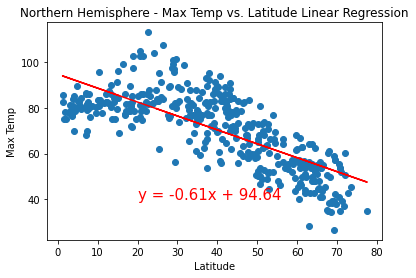

In [14]:
equation = linear_agression(northern["Lat"],northern["Max Temp"])
annotate(equation,20,40)
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel(f"Latitude")
plt.ylabel(f"Max Temp")
plt.savefig("Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7878496525575298


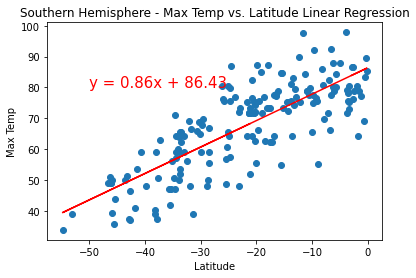

In [15]:
equation = linear_agression(southern["Lat"],southern["Max Temp"])
annotate(equation,-50,80)
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel(f"Latitude")
plt.ylabel(f"Max Temp")
plt.savefig("Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

Max Temp Summary

Both are inverse, one decreases in latitude and increases in temperature, while the other is the opposite.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.14944348522486195


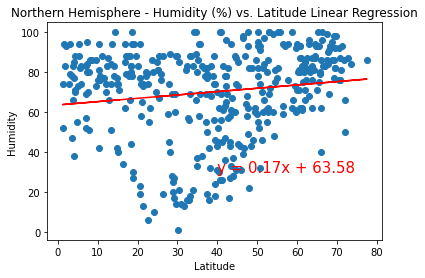

In [16]:
equation = linear_agression(northern["Lat"],northern["Humidity"])
annotate(equation,40,30)
plt.title(f"Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel(f"Latitude")
plt.ylabel(f"Humidity")
plt.savefig("Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.25593951439539153


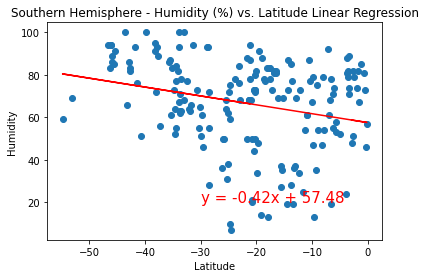

In [17]:
equation = linear_agression(southern["Lat"],southern["Humidity"])
annotate(equation,-30,20)
plt.title(f"Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel(f"Latitude")
plt.ylabel(f"Humidity")
plt.savefig("Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

Humidity Summary

Both are very similar, in that as latitude increases, the humidity is constant.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.11857720498802143


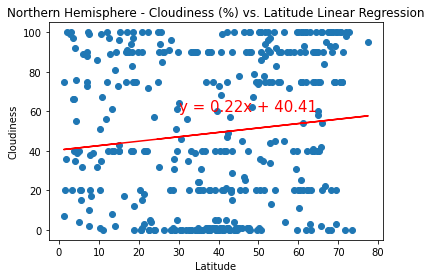

In [18]:
equation = linear_agression(northern["Lat"],northern["Cloudiness"])
annotate(equation,30,60)
plt.title(f"Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel(f"Latitude")
plt.ylabel(f"Cloudiness")
plt.savefig("Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.12054172675355052


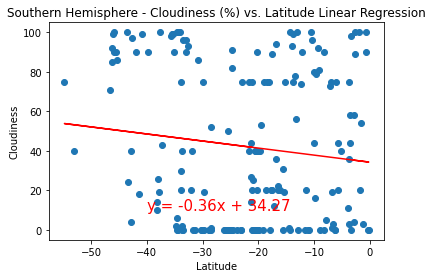

In [19]:
equation = linear_agression(southern["Lat"],southern["Cloudiness"])
annotate(equation,-40,10)
plt.title(f"Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel(f"Latitude")
plt.ylabel(f"Cloudiness")
plt.savefig("Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

Cloudiness Summary

Both are rather similar, as both are rather constant, with a slight change at the end. Where the Northern Hemisphere is going upwards, and the Southern Hemisphere is going downward.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.048999774292752776


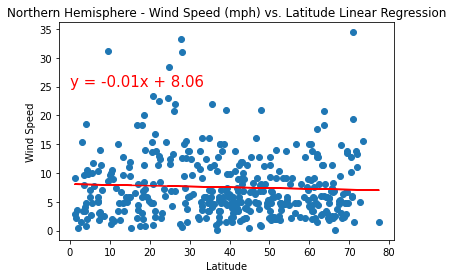

In [20]:
equation = linear_agression(northern["Lat"],northern["Wind Speed"])
annotate(equation,0,25)
plt.title(f"Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel(f"Latitude")
plt.ylabel(f"Wind Speed")
plt.savefig("Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.08609650369982991


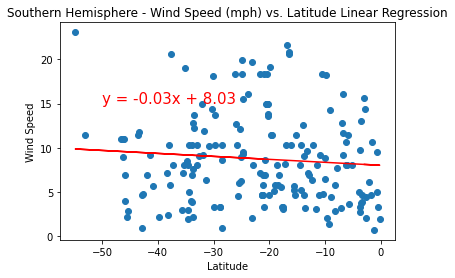

In [21]:
equation = linear_agression(southern["Lat"],southern["Wind Speed"])
annotate(equation,-50,15)
plt.title(f"Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel(f"Latitude")
plt.ylabel(f"Wind Speed")
plt.savefig("Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

Wind Speed Summary

Wind speed is pretty similar in both of the plots, being similar in mph. The highest wind speeds though, are in the Northern Hemisphere.